# Smart Home Data Analysis

In [11]:
# basic imports and notebook configurations
# standard Python modules
import calendar
import copy
import csv
import datetime
import importlib
import itertools
import logging
import os
import sys

# additional Python modules
import dateutil
import matplotlib.pyplot as plt
import numpy as np
import pytz
%load_ext autoreload
%autoreload 2
%matplotlib inline

# own python modules
from methods import *

# %aimport analyis
#importlib.reload(influx_db)
#importlib.reload(plot_tools)
plt.style.use('classic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## logging configuration

In [12]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')
log = logging.getLogger(os.path.splitext(os.path.basename(sys.argv[0]))[0])
log.setLevel(logging.DEBUG)

### Development setup

2023-03-27 13:42:09,648 - INFO - methods.py - get_image_files - found 334 images


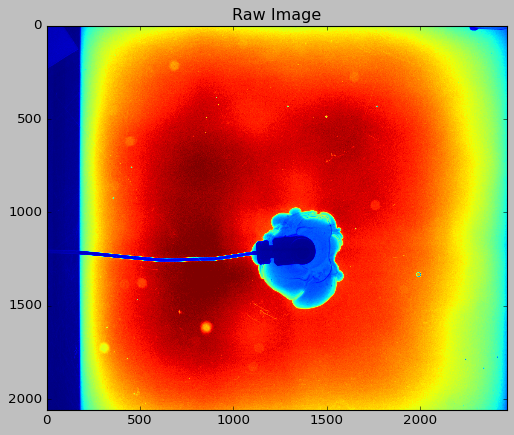

2023-03-27 13:42:10,022 - INFO - methods.py - segment_camera - Cam seed value: 14
2023-03-27 13:42:10,085 - INFO - methods.py - segment_camera - Unique values cam [0 1]


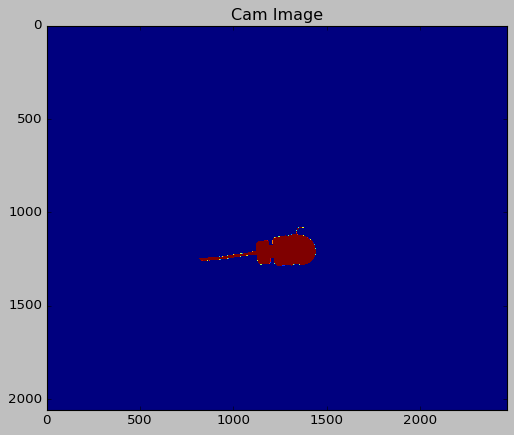

2023-03-27 13:42:10,384 - INFO - methods.py - segment_camera - Insta seed value: 63
2023-03-27 13:42:10,587 - INFO - methods.py - segment_camera - Unique values insta [0 2]


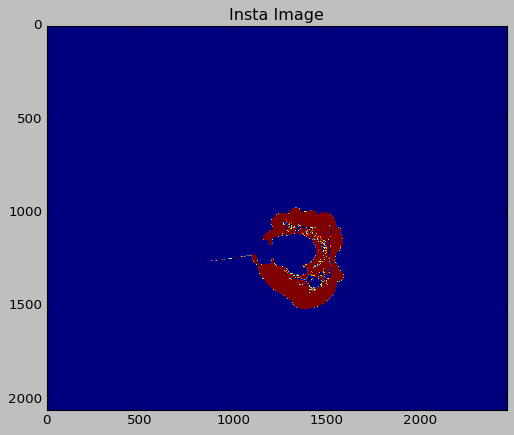

In [61]:
# read config
config = get_config()
# get dev case
case = config["cases"][0]
# get image name
image = get_image_files(config, case, "png_cases")[0]

segment_camera(config, case, image)